## Results 1.1

Homography Matrix:
[[-1.00558557e+00 -3.73879622e+00  5.64089833e+02]
 [-7.96649966e-01 -1.87633322e+01  3.25702903e+03]
 [-5.42419097e-04 -9.16140820e-03  1.00000000e+00]]


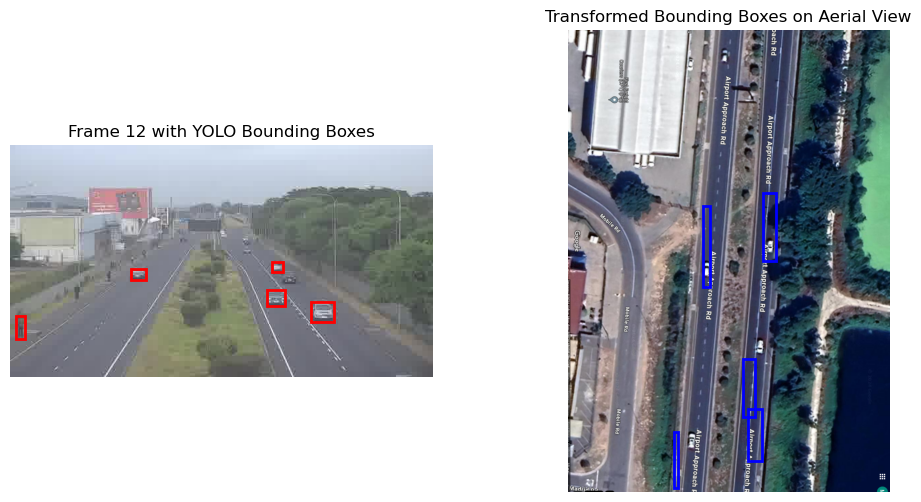

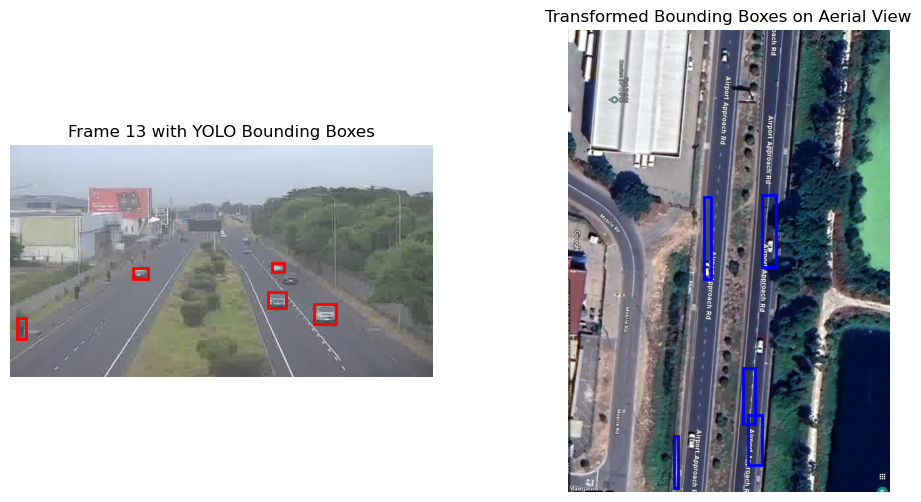

In [1]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2

# Paths
BASE_DIR = "/home/jovyan/Projeto_PIV/data/1.1/CTownAirport_1.1"
RESULTS_DIR = os.path.join(BASE_DIR, "results_1.1")
YOLO_DIR = os.path.join(BASE_DIR, "yolo")
AERIAL_IMAGE_PATH = os.path.join(BASE_DIR, "airport_CapeTown_aerial.png")
IMAGES_DIR = os.path.join(BASE_DIR, "images")

def plot_bounding_boxes(image, bounding_boxes, title, color='red'):
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    for bbox in bounding_boxes:
        x1, y1, x2, y2 = bbox
        plt.gca().add_patch(
            plt.Rectangle((x1, y1), x2 - x1, y2 - y1, edgecolor=color, facecolor='none', linewidth=2)
        )

def visualize_results():
    # Load aerial image
    aerial_image = cv2.imread(AERIAL_IMAGE_PATH)
    aerial_image = cv2.cvtColor(aerial_image, cv2.COLOR_BGR2RGB)

    for frame_idx in range(12, 14):  # Last 10 frames
        # Load the original frame image
        frame_path = os.path.join(IMAGES_DIR, f'img_{frame_idx:04d}.jpg')
        frame_image = cv2.imread(frame_path)
        frame_image = cv2.cvtColor(frame_image, cv2.COLOR_BGR2RGB)

        # Load the YOLO data
        yolo_file = os.path.join(YOLO_DIR, f'yolo_{frame_idx:04d}.mat')
        yolo_data = loadmat(yolo_file)

        # Load the transformed YOLO data
        yolo_output_file = os.path.join(RESULTS_DIR, f'yolooutput_{frame_idx:04d}.mat')
        yolo_output_data = loadmat(yolo_output_file)

        # Plot original frame with bounding boxes
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plot_bounding_boxes(frame_image, yolo_data['xyxy'], title=f"Frame {frame_idx} with YOLO Bounding Boxes", color='red')

        # Plot aerial image with transformed bounding boxes
        plt.subplot(1, 2, 2)
        plot_bounding_boxes(aerial_image, yolo_output_data['xyxy'], title="Transformed Bounding Boxes on Aerial View", color='blue')

        plt.show()

if __name__ == "__main__":

    # Load the homography matrix
    homography_file = os.path.join(RESULTS_DIR, 'homography.mat')
    homography_data = loadmat(homography_file)
    homography_matrix = homography_data['H']
    
    # Print the homography matrix
    print("Homography Matrix:")
    print(homography_matrix)
    visualize_results()
